# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

In [3]:
print(data.columns)
#Посмотрем на столбцы в датафрейме  

#заменим пропуски и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['is_apartment'] = data['is_apartment'].fillna(False)
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

#посмотрим данные с пропущенными значениями в floors_total- ничего общего между ними нет, оставим как есть
data[data['floors_total'].isna()]

data['living_area'].describe()


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

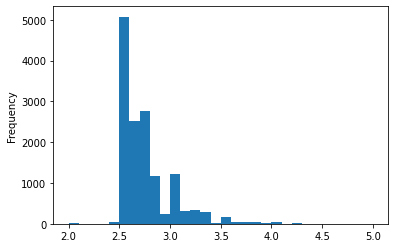

In [4]:
#посмотрим параметр ceiling_height
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
data['ceiling_height'].describe()

На графике сверху видим что есть анамально высокие знаения. Нужно это поправить 

In [5]:
data['ceiling_height'] = data['ceiling_height'].replace({25.0: 2.5, 27.5: 2.7, 32.0: 3.2, 27.0: 2.7, 26.0: 2.6, 22.6: 2.2, 24.0: 2.4, 100.0: 10.0, 25.0: 2.5, 20.0: 2.0})
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Уже другое дело, анамально высокие сначение ушли. Это сделает наши данные более чистыми

Теперь нужно разобраться с неявные дубликаты

In [6]:
word_list = ['поселок городского типа', 'поселок Мурино', 'деревня Кудрово', 'Коммунары',\
             'поселок Рябово' ,'поселок станции Вещево','поселок станции Приветнинское',\
             'коттеджный поселок Лесное', 'поселок при железнодорожной станции',\
            'садоводческое некоммерческое товарищество']
name = ['городской посёлок', 'Мурино', 'Кудрово', 'Коммунар', 'поселок городского типа Рябово',\
        'поселок при железнодорожной станции Вещево',\
        'поселок при железнодорожной станции Приветнинское', 'поселок Лесное', 'поселок станции',\
       'садовое товарищество']
 
for word in word_list:
    data['locality_name'] = data['locality_name'].replace(word_list, name, regex=True)  
 

list(data['locality_name'].sort_values(ascending=False).unique())   

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садовое товарищество Лесная Поляна',
 'посёлок станции Свирь',
 'посёлок станции Громово',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок при железнодорожной станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Сиверский',
 'посёлок городского типа Рябово',
 'посёлок городского типа Рощино',
 'посёлок городского типа Павлово',
 'посёлок городского типа Мга',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Кузьмоловский',
 'посёлок горо

Другое дело, Теперь названия верные и мы можем продолжить наш анализ. Но можно посмотреть что там по стоимости и квадратуре

In [7]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [8]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Так тут мы видем что есть очень огромный и очень догорие квартиры, это крайне редное явление, по этому я думаю возьмем площадь до 120кв метра и стоимости до 20 милионов. Средняя стоимость жилья 

In [9]:
data = data.query('last_price <= 20000000 and total_area <= 120')
data['total_area'].describe()


count    22468.000000
mean        54.528657
std         19.749054
min         12.000000
25%         39.400000
50%         50.200000
75%         65.600000
max        120.000000
Name: total_area, dtype: float64

In [10]:
data['last_price'].describe()

count    2.246800e+04
mean     5.216496e+06
std      2.905341e+06
min      1.219000e+04
25%      3.359500e+06
50%      4.500000e+06
75%      6.300000e+06
max      2.000000e+07
Name: last_price, dtype: float64

Теперь можно проводить анализ дальше. Данные чистые)) 

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
#Цена на один метр
data['price_per_square_meter'] = data['last_price'] / data['total_area']

#переведем в человеческий вид
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

#День недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#Месяц
data['month_exposition'] = data['first_day_exposition'].dt.month

#Год
data['year_exposition'] = data['first_day_exposition'].dt.year

#Распределение по этажам 
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
#категоризуем этажи  
data['floor_category'] = data.apply(floor_category, axis = 1)

#жилой плозади к общей
data['useful_area_ratio'] = data['living_area'] / data['total_area']

#отношения площади кухни к общей
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']


### Проведите исследовательский анализ данных

count    20704.000000
mean        31.200969
std         13.726975
min          2.000000
25%         18.300000
50%         29.800000
75%         40.100000
max        101.000000
Name: living_area, dtype: float64

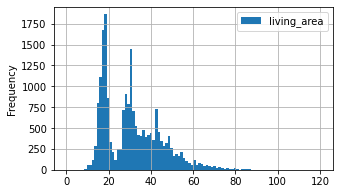

In [13]:
#жилая площадь
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,120))
data['living_area'].describe()

Тут мы видим что самые популярные квартиры с жилой площадью с 18-20 метрама, это средний размер однушки или студии. Поэтому данные нормальные

count    2.246800e+04
mean     5.216496e+06
std      2.905341e+06
min      1.219000e+04
25%      3.359500e+06
50%      4.500000e+06
75%      6.300000e+06
max      2.000000e+07
Name: last_price, dtype: float64

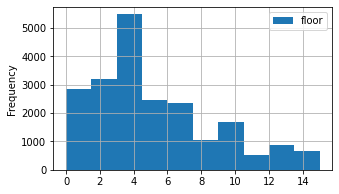

In [14]:
#изучим этажность 
data.plot(y = 'floor', kind = 'hist', bins = 10, grid=True, range = (0,15), figsize = (5,3))
data['last_price'].describe()

Тут мы видим что самый популярный этож это четвертый, так оно и есть. Лифт сломался дойти по лестницу не проблема. И шум с окна не так слышно. Данные нормальной продолжаем анализ

count      22389
unique         3
top       другой
freq       16461
Name: floor_category, dtype: object

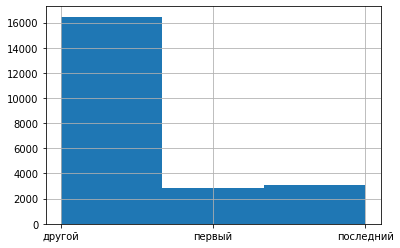

In [15]:
data['floor_category'].hist(bins=3)
data['floor_category'].describe()


На первой и последнем этаже квартир сначительно мешьше чем на других, это на самые популярные этажи. 

count    22468.000000
mean         1.956204
std          0.909706
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

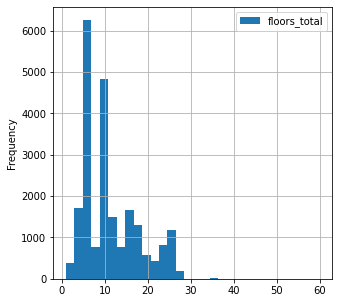

In [16]:
#изучим число комнат
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,5))
data['rooms'].describe()


Тут мы видим, что самые популярные дом в 8 и 10 этажей, анамальных значений тут нет

count    22468.000000
mean         1.956204
std          0.909706
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

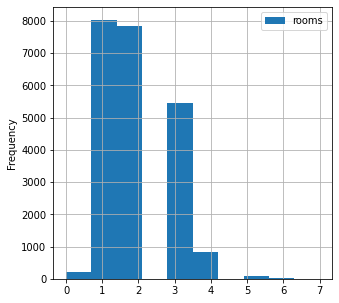

In [17]:
#изучим число комнат
data.plot(y = 'rooms', kind = 'hist', bins = 10, grid=True, figsize = (5,5))
data['rooms'].describe()

Тут тоже все чисто, самые популярные однушки и двушки

count    13666.000000
mean         2.702537
std          0.293176
min          1.000000
25%          2.500000
50%          2.640000
75%          2.770000
max         14.000000
Name: ceiling_height, dtype: float64

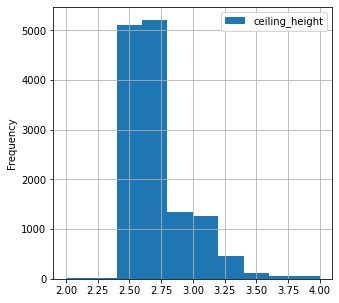

In [18]:
#изучим высоту потолков
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range = (2,4), grid=True, figsize = (5,5))
data['ceiling_height'].describe()


Тут тоже все чисто, самые популярная высота потолков 2.5 и 2.75 метра, как в стандартном доме

count    16971.000000
mean     28872.575629
std      12852.579630
min          0.000000
25%      18274.000000
50%      26993.000000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

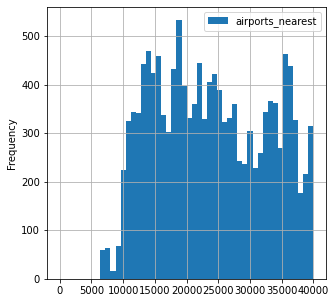

In [19]:
#Как дела у нас с дорогой в аэропорт
data.plot(y = 'airports_nearest', kind = 'hist', bins = 50, range = (2,40000), grid=True, figsize = (5,5))
data['airports_nearest'].describe()


Тут мы видим что на дорогу в аэропорт нужно заложить на один час больше, минимум ехать 10 километров

count    7267.000000
mean      495.583872
std       343.357570
min         1.000000
25%       291.000000
50%       458.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

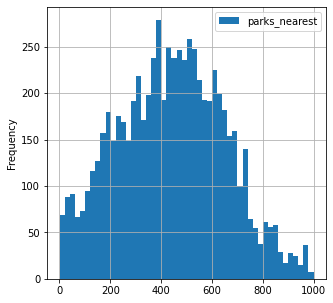

In [20]:
#А что у нас с парками 
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, range = (2,1000), grid=True, figsize = (5,5))
data['parks_nearest'].describe()


Ну тут у нас вообще красота, самые популырные квартиры с 400 метрах от парка, не жизнь а сказка 

In [1]:
#А что у нас с датой публикации
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 7, range = (1,7), grid=True, figsize = (5,5))
data.plot(y = 'month_exposition', kind = 'hist', bins = 15, range = (1,12), grid=True, figsize = (5,5))

NameError: name 'data' is not defined

Тут мы видим что самые активные продавцы в начали недели и в начале месяца, но есть один момент. С 15го числа квартиры не продавались, возможно у нас есть не все данные 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_per_square_meter',
       'weekday_exposition', 'month_exposition', 'year_exposition',
       'floor_category', 'useful_area_ratio', 'kitchen_area_ratio'],
      dtype='object')


45      878
60      535
7       231
30      202
4       171
       ... 
837       1
885       1
933       1
1045      1
1391      1
Name: days_exposition, Length: 1105, dtype: int64

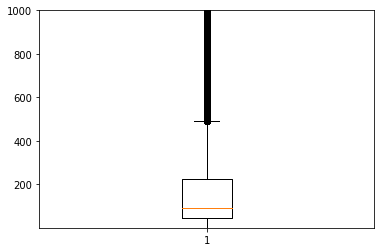

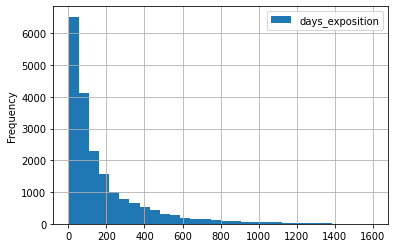

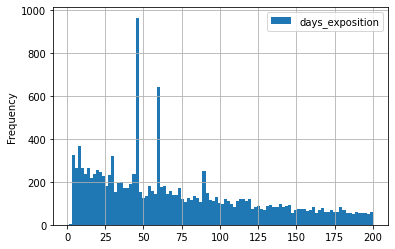

In [22]:
print(data.columns)

#диаграмма размаха
import matplotlib.pyplot as plt
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
data[data['days_exposition']!=0]['days_exposition'].value_counts()


Судя по гистограмме - мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. Сделав гистограмму со значениями от 0 до 200 с кол-вом корзин 100, обнаружили выбивающиеся значения и методом value_counts убедились в этом - у нас аномалии на 45, 60, 7, 30, 90 днях - это наиболее популярное количество дней до снятия объявления.

Изучим зависимость цены квадратного метра от общей площади квартиры.

0.07122123809126231

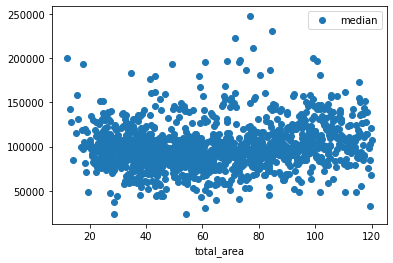

In [23]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')

pivot_table_total_area.sort_values('median', ascending = False)

data['total_area'].corr(data['price_per_square_meter'])

Видим что зависимость очень слабая чем больше площадь тем немного выше стоимость. А что по комнатам 

-0.13809928624350162

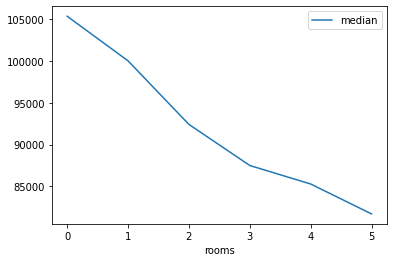

In [24]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(y = 'median')

pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)

data['rooms'].corr(data['price_per_square_meter'])

По графику видно что выгодней всего купить трешку, студии и однушки самый дорогие за метр площади. Теперь посмотрим этажи

,mean,count,median
floor_category,,,
другой,98897.388859,16461,97364.0
первый,79895.405434,2834,80823.5
последний,86480.057531,3094,86138.0


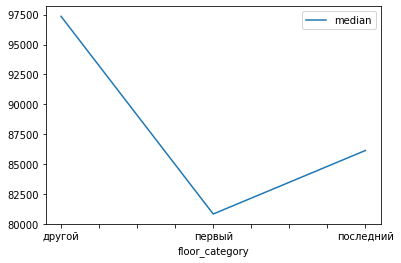

In [25]:
pivot_table_floor_category = data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median')
pivot_table_floor_category

Поправил график, тут мы видим что квартиры на первом этаже дешевле всех, так же на последнм этаже не самый популярный вариант. Квартиры не на первом и не на последнем самый дорогие и популярные 

Тут мы видим что чем выше квартира, тем дороже. Посмотрим по отдалению от центра

-0.40080171971787665

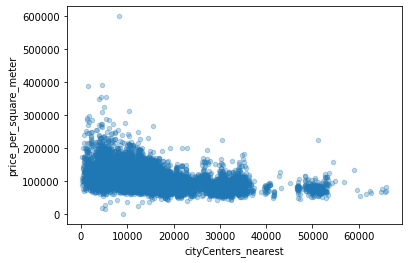

In [26]:
data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'cityCenters_nearest', alpha = 0.3)

data['cityCenters_nearest'].corr(data['price_per_square_meter'])

Ну не медрено что в центре жилье дороже, видим явную зависимость стоимости квадратного метра от близости к центру

Посмотрим зависимость от дня недели и месяца и года 

,mean,count,median
weekday_exposition,,,
1,95417.548468,3982,94911.0
2,95551.132925,3754,94728.0
0,94674.952339,3420,93750.0
3,94670.975143,4023,93750.0
4,94839.485969,3813,93750.0
6,93928.342170,1622,93717.0
5,93323.901294,1854,92509.5


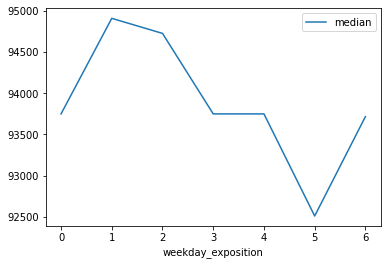

In [27]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

видим, что чем ближе ко вторнику выставлены объявления тем в среднем выше стоимость а по субботам стоимость самая низкая

,mean,count,median
month_exposition,,,
4,96638.889771,2268,95555.0
8,95701.209736,1664,95168.5
9,96320.807344,1879,94896.0
1,95078.125529,1418,94444.0
11,95151.388765,2243,94390.0
3,95041.466071,2461,94322.0
2,94148.111244,2499,94130.0
7,94821.557367,1595,93797.0
10,94231.911417,2032,93333.0


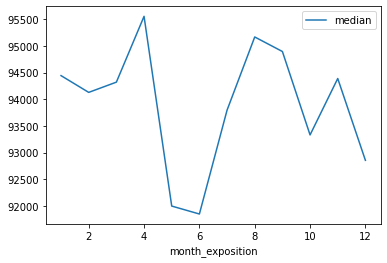

In [28]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

самая высокая стоимость метра в апреле и августе, самая низкая стоимость в мае и июне

,mean,count,median
year_exposition,,,
2014,106015.094340,106,103950.0
2019,102184.214964,2740,102578.5
2018,94761.516011,8182,95000.0
2015,95035.666978,1072,91672.5
2017,92849.483065,7765,91578.0
2016,92540.530542,2603,90845.0


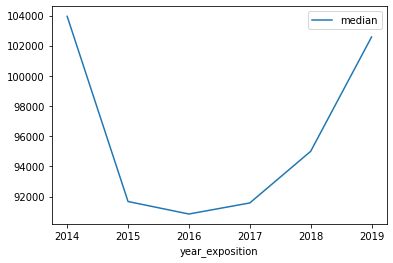

In [29]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

видим, что с 2014 до 2016 года цена падала, но далее начала увеличиваться! Мы не рассматриваем сегментацию рынка и по факту стоимость аналогичных квартир могла себя вести абсолютно иначе от года к году! В выводе присутствует реальный пример.

In [30]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table
#самая высокая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()]

,count,mean
locality_name,,
Санкт-Петербург,14570,108958.307344


In [31]:
#самая низкая стоимость
locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()]

,count,mean
locality_name,,
Выборг,232,58229.310345


самая высокая стоимость жилья из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

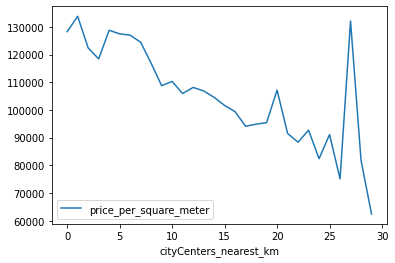

In [32]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(999999)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=999999').pivot_table(index = 'cityCenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot()

Радиус тут не причем) Смотрел на youtube урок и добавил сюда))) 
Тут мы видим что чем дальше находиться квартира, тем она дороже стоит. Есть вылеты на 20км и 27км, возможно это ошибка в данных. Или просто дорогой ЖК там находиться 



### Общий вывод

  Были обработаны данные, пропуски, заполнены пустые значания. Была добавлены стоимость за один метр площади. Так же вывел день месяц год и категории по этажам. 
  Были изучины следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.
  Изучая время продажи квартир выявилось, что большое количество объявлений было автоматически снято с Яндекс Недвижимость и дату из снятия нельзя считать датой продажи квартиры, поэтому, изучая средние сроки продажи квартир - данные значения не учитывались. Было выявлено при помощи диаграммы размаха, что нормальные значения продажи квартир варьируются от 1 до 600 дней. На стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь. 